In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:

single_image= X_train[0]

In [7]:
single_image.shape

(28, 28)

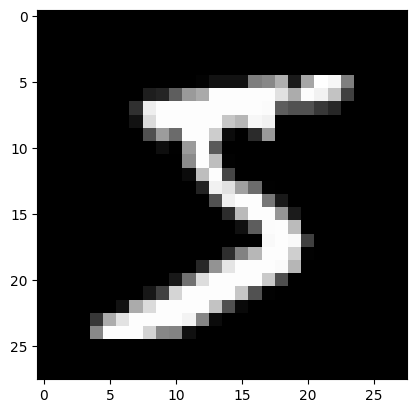

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:

X_train.max()

255

In [12]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()


X_train_scaled.max()

1.0

In [14]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape

(60000, 10)

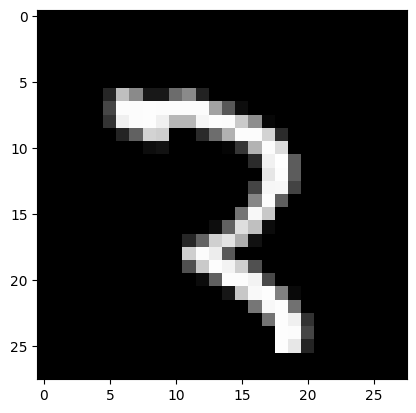

In [17]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [18]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [20]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))

In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 128)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 16)                346128    
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 347578 (1.33 MB)
Trainable params: 347578 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')


In [23]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 69s 72ms/step - loss: 0.2517 - accuracy: 0.9406 - val_loss: 0.1003 - val_accuracy: 0.9743
Epoch 2/5
938/938 [==============================] - 65s 69ms/step - loss: 0.0771 - accuracy: 0.9803 - val_loss: 0.0646 - val_accuracy: 0.9812
Epoch 3/5
938/938 [==============================] - 64s 68ms/step - loss: 0.0518 - accuracy: 0.9862 - val_loss: 0.0581 - val_accuracy: 0.9829
Epoch 4/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0383 - accuracy: 0.9892 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 5/5
938/938 [==============================] - 79s 84ms/step - loss: 0.0279 - accuracy: 0.9928 - val_loss: 0.0574 - val_accuracy: 0.9825


In [24]:
metrics = pd.DataFrame(model.history.history)

In [25]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.251743,0.940633,0.100274,0.9743
1,0.077105,0.980267,0.064601,0.9812
2,0.051770,0.986250,0.058057,0.9829
3,0.038339,0.989217,0.052762,0.9836
4,0.027893,0.992783,0.057357,0.9825


<Axes: >

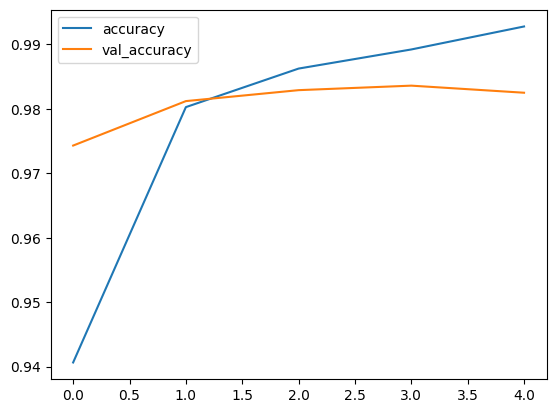

In [26]:

metrics[['accuracy','val_accuracy']].plot()

<Axes: >

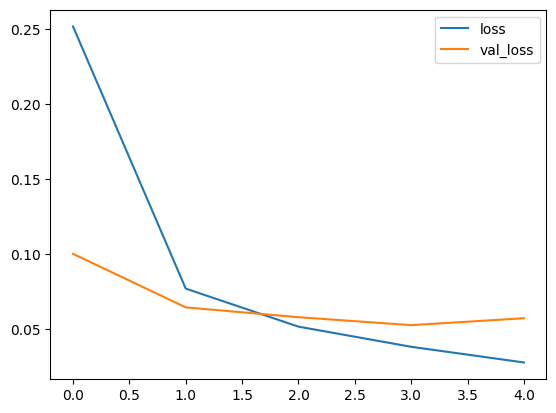

In [27]:
metrics[['loss','val_loss']].plot()

In [28]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 9ms/step


In [29]:

print(confusion_matrix(y_test,x_test_predictions))

[[ 974    0    2    1    0    0    1    1    1    0]
 [   0 1132    0    1    1    0    0    1    0    0]
 [   4   13  999    3    3    0    2    4    3    1]
 [   1    0    1  998    0    2    0    6    2    0]
 [   1    0    0    0  976    0    3    0    1    1]
 [   2    0    0    7    0  879    3    0    1    0]
 [   6    3    0    0    2    1  943    0    3    0]
 [   1    6   11    0    1    0    0 1007    1    1]
 [   5    0    0    1    2    1    0    6  957    2]
 [   3    5    1    4   17    6    0    9    4  960]]


In [30]:

print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
img = image.load_img('l1.jpeg')
type(img)
img = image.load_img('l1.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [33]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 22ms/step


In [34]:
print(x_single_prediction)

[5]


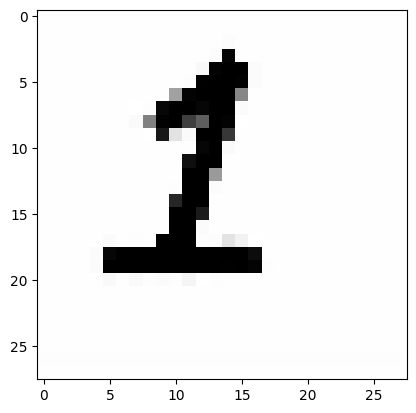

In [35]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [36]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [37]:
  x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [38]:
print(x_single_prediction)

[0]
